# Q. A cloth manufacturing company is interested to know about the segment or attributes which causes high sale.

In [11]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
st=pd.read_csv("Company_Data.csv")
st.head(4)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes


# EDA

In [13]:
st.shape

(400, 11)

In [14]:
st.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [15]:
st.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [16]:
st.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [17]:
st['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [18]:
st.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Distribution of Class Variable

C:\Users\Vish\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Sales Distribution Plot'}, xlabel='Sales', ylabel='Density'>

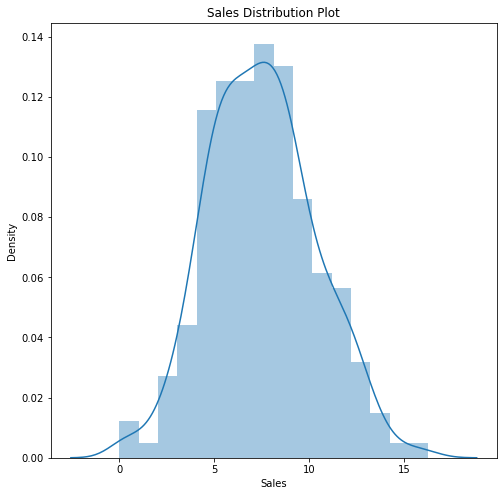

In [19]:
plt.figure(figsize=(8,8))
plt.title('Sales Distribution Plot')
sns.distplot(st['Sales'])

Looks like the Sales are Normally distributed. 

# Converting the sales column into categorical variable

In [20]:
sales_val = []
for value in st["Sales"]:
    if value<=7.40:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
st["sales_val"]= sales_val

In [21]:
st.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,high


In [22]:
#dropping the sales column
st=st.drop(['Sales'], axis=1)

In [23]:
st.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low


# Splitting the data

In [24]:
X = st.drop('sales_val', axis=1)
y = st['sales_val']

In [29]:
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])


x1 = encoder.fit_transform(X)

# Scaling the data

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x1= scaler.fit_transform(x1)

In [31]:
x2 = pd.DataFrame(x1, columns=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'])

In [32]:
x2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.65,0.082902,0.500000,0.015414,0.096774,-2.0,-0.476190,0.75,0.0,0.0
1,-0.70,-0.435233,0.916667,-0.046243,-1.096774,-1.0,0.400000,-1.00,0.0,0.0
2,-0.60,-0.704663,0.416667,-0.011561,-1.193548,0.0,0.171429,-0.50,0.0,0.0
3,-0.40,0.642487,-0.083333,0.747592,-0.645161,0.0,0.019048,0.00,0.0,0.0
4,0.80,-0.103627,-0.166667,0.262042,0.354839,-2.0,-0.628571,-0.25,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
395,0.65,0.808290,1.000000,-0.265896,0.354839,-1.0,-0.819048,0.00,0.0,0.0
396,0.70,-0.953368,-0.166667,-0.905588,0.096774,0.0,0.019048,-0.75,1.0,0.0
397,1.85,-0.891192,0.583333,0.369942,1.354839,0.0,-0.552381,1.00,0.0,0.0
398,-1.25,0.207254,0.166667,0.046243,-0.709677,-2.0,-0.171429,-0.50,0.0,0.0


# Splitting the data into train and test data

In [33]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [34]:
#Decision tree classifier with gini index
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini.fit(x2_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [36]:
y_pred = clf_gini.predict(x2_test)

In [37]:
#Accuracy check for test
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7375


# Comparing the train and test accuracy

In [38]:
y_pred_train = clf_gini.predict(x2_train)

In [39]:
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training accuracy score: 0.8969


# Training and Testing Scores

In [40]:
#checking for under and overfitting
print('Training score: {:.4f}'.format(clf_gini.score(x2_train, y_train)))

print('Test score: {:.4f}'.format(clf_gini.score(x2_test, y_test)))
#both the values are similar there exists overfitting in the data

Training score: 0.8969
Test score: 0.7375


[Text(316.20000000000005, 1009.5428571428572, 'X[4] <= -0.79\ngini = 0.5\nsamples = 320\nvalue = [162, 158]'),
 Text(148.8, 854.2285714285715, 'X[5] <= -1.5\ngini = 0.124\nsamples = 45\nvalue = [42, 3]'),
 Text(111.60000000000001, 698.9142857142858, 'X[3] <= -0.013\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(74.4, 543.6, 'X[3] <= -0.642\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(37.2, 388.28571428571433, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(111.60000000000001, 388.28571428571433, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(148.8, 543.6, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(186.0, 698.9142857142858, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(483.6, 854.2285714285715, 'X[5] <= -1.5\ngini = 0.492\nsamples = 275\nvalue = [120, 155]'),
 Text(297.6, 698.9142857142858, 'X[0] <= 1.3\ngini = 0.281\nsamples = 65\nvalue = [11, 54]'),
 Text(260.40000000000003, 543.6, 'X[2] <= 0.875\ngini = 0.225\nsamples = 62\nvalue = [8, 54]'),
 Text(186.0

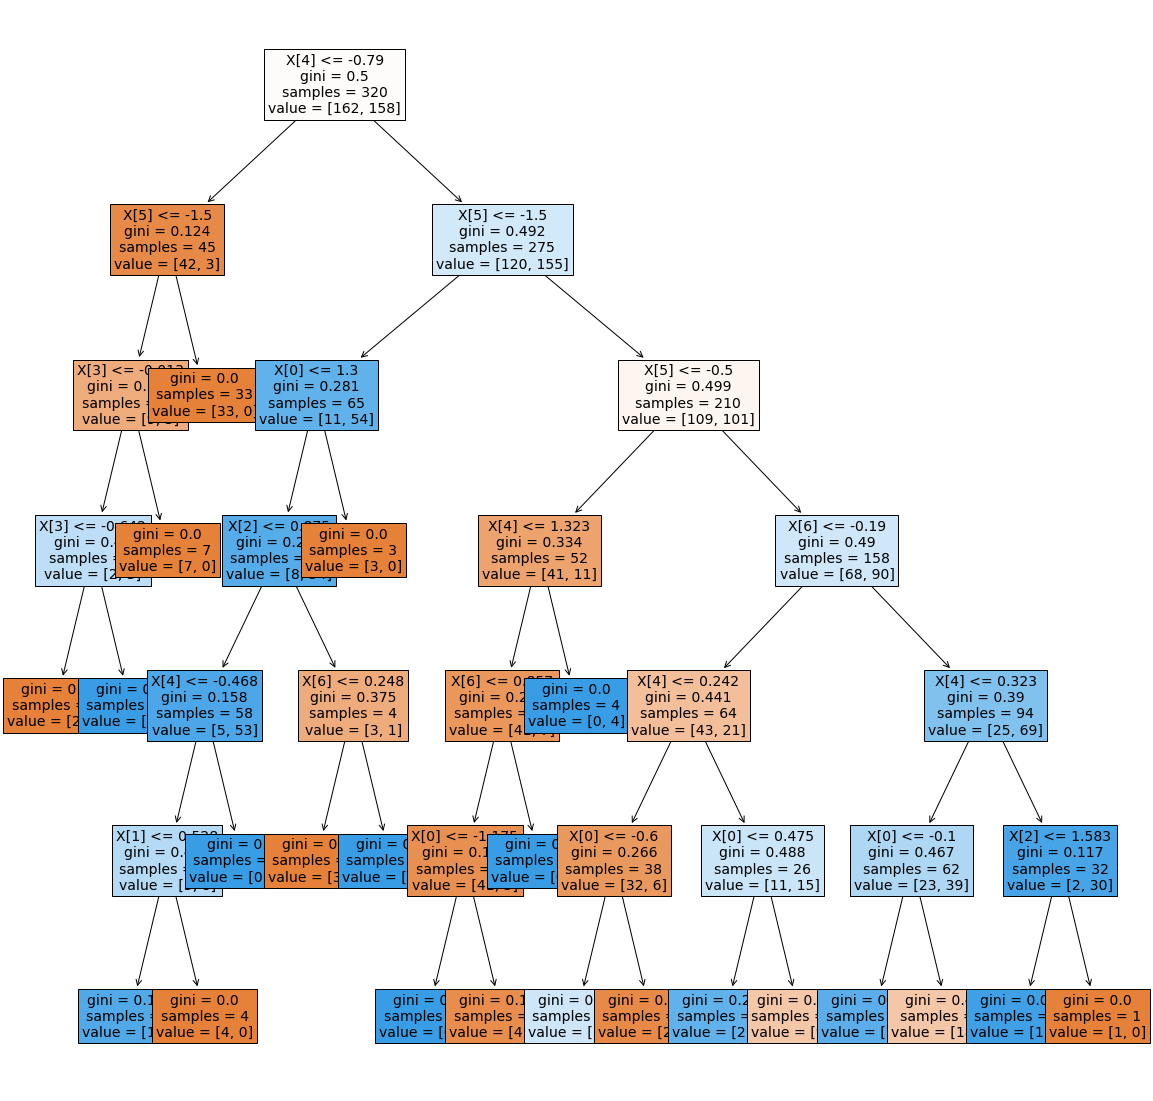

In [41]:
#visualize the decision tree
plt.figure(figsize=(20,20))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x2_train, y_train), filled=True, fontsize=14)

# Tree with Max 5 nodes and Min 5 leafs

[Text(209.25, 475.65000000000003, 'X[4] <= -0.79\ngini = 0.5\nsamples = 320\nvalue = [162, 158]'),
 Text(139.5, 339.75, 'gini = 0.124\nsamples = 45\nvalue = [42, 3]'),
 Text(279.0, 339.75, 'X[5] <= -1.5\ngini = 0.492\nsamples = 275\nvalue = [120, 155]'),
 Text(139.5, 203.85000000000002, 'X[0] <= 1.3\ngini = 0.281\nsamples = 65\nvalue = [11, 54]'),
 Text(69.75, 67.94999999999999, 'gini = 0.225\nsamples = 62\nvalue = [8, 54]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(418.5, 203.85000000000002, 'X[5] <= -0.5\ngini = 0.499\nsamples = 210\nvalue = [109, 101]'),
 Text(348.75, 67.94999999999999, 'gini = 0.334\nsamples = 52\nvalue = [41, 11]'),
 Text(488.25, 67.94999999999999, 'gini = 0.49\nsamples = 158\nvalue = [68, 90]')]

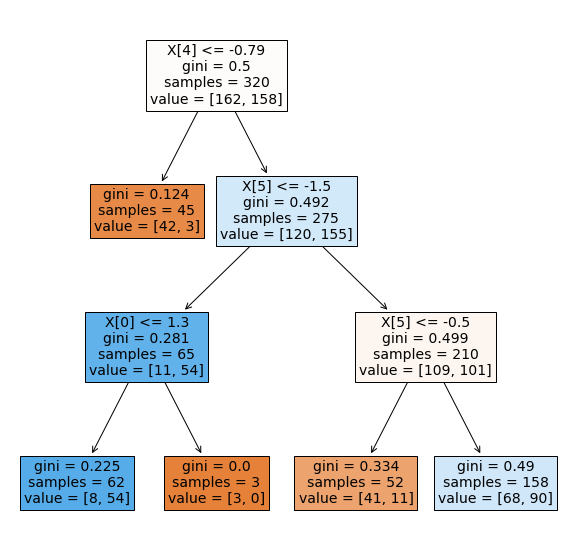

In [42]:
clf_gini2 =DecisionTreeClassifier(max_leaf_nodes=5, max_depth=3, min_samples_leaf=3)
plt.figure(figsize=(10,10))

from sklearn import tree

tree.plot_tree(clf_gini2.fit(x2_train, y_train), filled=True, fontsize=14)

In [43]:
#Decision tree classifier using criterion classifier
en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
en.fit(x2_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [44]:
#test prediction
y_pred_en = en.predict(x2_test)

In [45]:
from sklearn.metrics import accuracy_score

print('Test accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Test accuracy : 0.6875


In [46]:
y_pred_train_en = en.predict(x2_train)
#train prediction

In [47]:
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training accuracy score: 0.8906


[Text(311.6953125, 1009.5428571428572, 'X[4] <= -0.79\nentropy = 1.0\nsamples = 320\nvalue = [162, 158]'),
 Text(139.5, 854.2285714285715, 'X[5] <= -1.5\nentropy = 0.353\nsamples = 45\nvalue = [42, 3]'),
 Text(104.625, 698.9142857142858, 'X[3] <= -0.013\nentropy = 0.811\nsamples = 12\nvalue = [9, 3]'),
 Text(69.75, 543.6, 'X[3] <= -0.642\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(34.875, 388.28571428571433, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(104.625, 388.28571428571433, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(139.5, 543.6, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(174.375, 698.9142857142858, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(483.890625, 854.2285714285715, 'X[5] <= -1.5\nentropy = 0.988\nsamples = 275\nvalue = [120, 155]'),
 Text(279.0, 698.9142857142858, 'X[0] <= 1.3\nentropy = 0.656\nsamples = 65\nvalue = [11, 54]'),
 Text(244.125, 543.6, 'X[1] <= 0.58\nentropy = 0.555\nsamples = 62\nvalue = [8, 54]'),
 Text(17

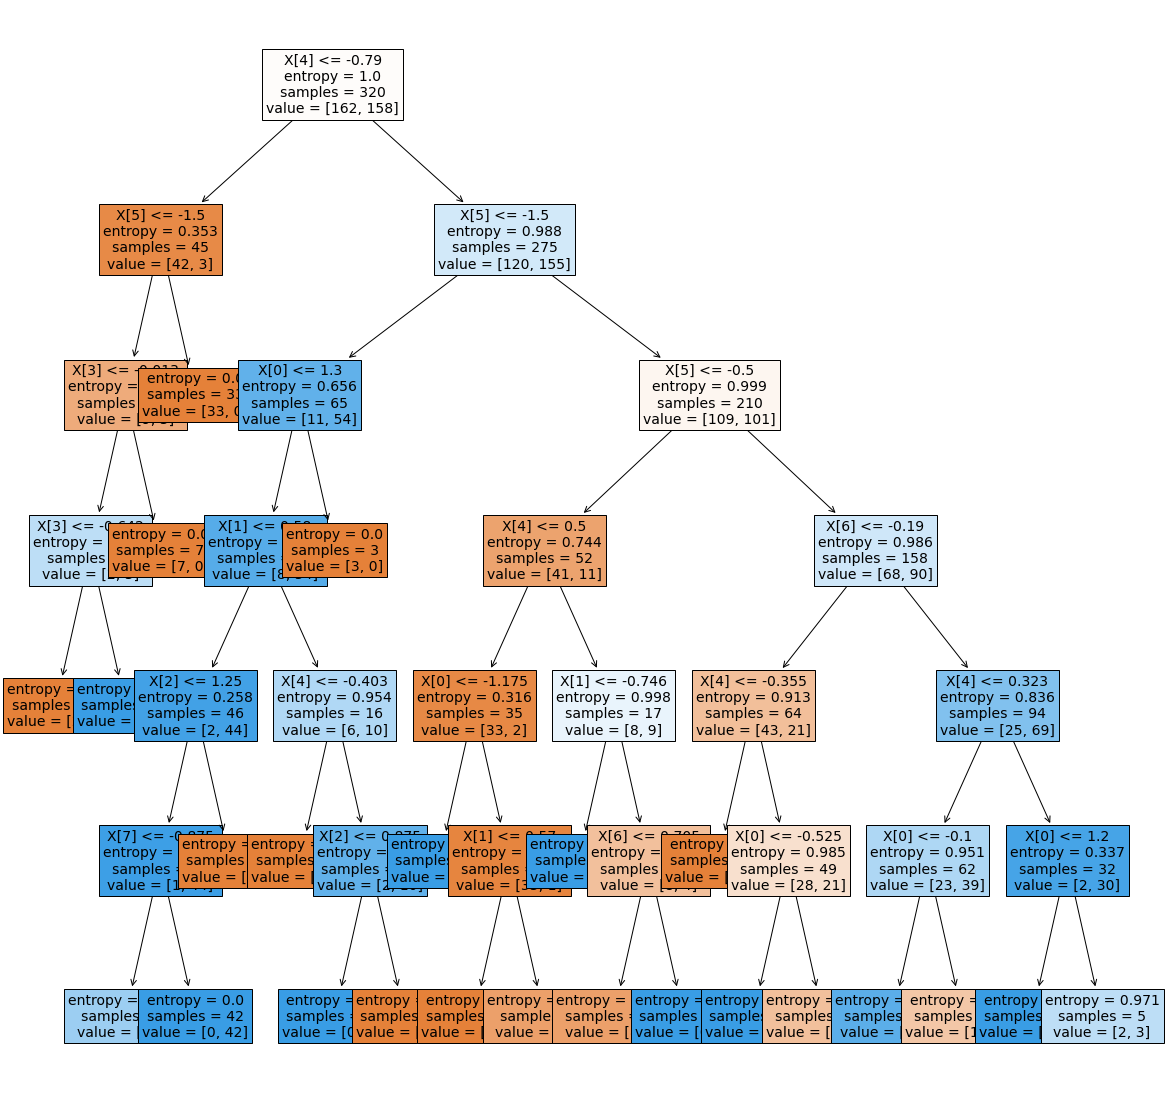

In [48]:
#visulizie the decision tree with criteron entropy
plt.figure(figsize=(20,20))

from sklearn import tree

tree.plot_tree(en.fit(x2_train, y_train), filled=True, fontsize=14)

# Tree with Max node 5 and Min leaf 3

[Text(159.42857142857142, 489.24, 'X[4] <= -0.79\nentropy = 1.0\nsamples = 320\nvalue = [162, 158]'),
 Text(79.71428571428571, 380.52000000000004, 'entropy = 0.353\nsamples = 45\nvalue = [42, 3]'),
 Text(239.1428571428571, 380.52000000000004, 'X[5] <= -1.5\nentropy = 0.988\nsamples = 275\nvalue = [120, 155]'),
 Text(159.42857142857142, 271.8, 'entropy = 0.656\nsamples = 65\nvalue = [11, 54]'),
 Text(318.85714285714283, 271.8, 'X[5] <= -0.5\nentropy = 0.999\nsamples = 210\nvalue = [109, 101]'),
 Text(239.1428571428571, 163.08000000000004, 'entropy = 0.744\nsamples = 52\nvalue = [41, 11]'),
 Text(398.57142857142856, 163.08000000000004, 'X[6] <= -0.19\nentropy = 0.986\nsamples = 158\nvalue = [68, 90]'),
 Text(318.85714285714283, 54.360000000000014, 'entropy = 0.913\nsamples = 64\nvalue = [43, 21]'),
 Text(478.2857142857142, 54.360000000000014, 'entropy = 0.836\nsamples = 94\nvalue = [25, 69]')]

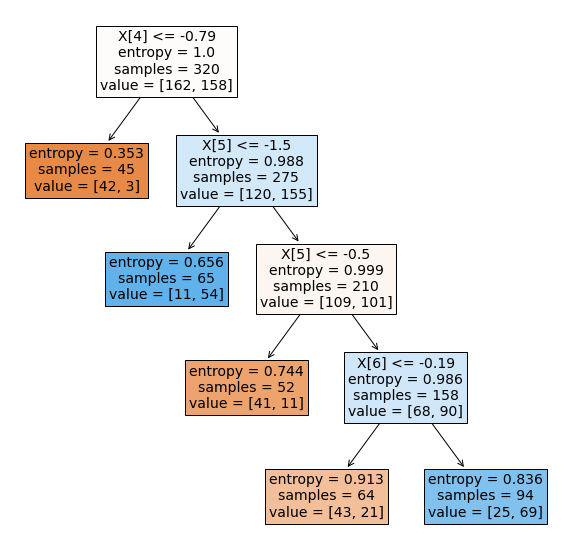

In [49]:
en2 =DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=5, min_samples_leaf=3)

plt.figure(figsize=(10,10))

from sklearn import tree

tree.plot_tree(en2.fit(x2_train, y_train), filled=True, fontsize=14)

In [50]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n\n ", confusion_matrix(y_test, y_pred_en))

Confusion Matrix:

  [[35  9]
 [16 20]]


In [51]:
#Classification report
from sklearn.metrics import classification_report
print("Report:\n", classification_report(y_test, y_pred_en))

Report:
               precision    recall  f1-score   support

        high       0.69      0.80      0.74        44
         low       0.69      0.56      0.62        36

    accuracy                           0.69        80
   macro avg       0.69      0.68      0.68        80
weighted avg       0.69      0.69      0.68        80



Accuracy of the entropy model is **69%**

# Feature Engineering

In [52]:
x2_train_fe=x2_train.drop(['Advertising', 'Population','Education','Income','ShelveLoc'],axis=1)
x2_test_fe=x2_test.drop(['Advertising', 'Population','Education','Income','ShelveLoc'],axis=1)

In [53]:
#DecisionTreeClassifier model with criterion gini index

clf_gini_fe = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini_fe.fit(x2_train_fe, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [54]:
y_pred_train_fe = clf_gini_fe.predict(x2_train_fe)

In [55]:
y_pred_test_fe = clf_gini_fe.predict(x2_test_fe)

In [56]:
print('Training set score: {:.4f}'.format(clf_gini_fe.score(x2_train_fe, y_train)))

print('Test set score: {:.4f}'.format(clf_gini_fe.score(x2_test_fe, y_test)))

Training set score: 0.8125
Test set score: 0.7125


In [57]:
#DecisionTreeClassifier with entropy 

clf_en_fe = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
clf_en_fe.fit(x2_train_fe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [58]:
y_pred_train_en_fe = clf_en_fe.predict(x2_train_fe)

In [59]:
y_pred_test_en_fe = clf_en_fe.predict(x2_test_fe)

In [60]:
print('Training data: {:.4f}'.format(clf_en_fe.score(x2_train_fe, y_train)))

print('Test data: {:.4f}'.format(clf_en_fe.score(x2_test_fe, y_test)))

Training data: 0.8031
Test data: 0.6500


# XGB boosting technique

In [61]:
import xgboost as xgb
import pandas as pd

In [62]:
x3_train=x2_train
x3_test=x2_test
y1_test=y_test
y1_train=y_train

In [63]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.1,
                max_depth = 5, n_estimators = 20)
xgb1.fit(x3_train,y1_train)
train_pred_xgb = xgb1.predict(x3_train)

C:\Users\Vish\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [64]:
import numpy as np
accuracy_train_data = np.mean(train_pred_xgb==y1_train) 
print(accuracy_train_data)

0.9625


In [65]:
test_pred_xgb=xgb1.predict(x3_test)

In [66]:
accuracy_test_data=np.mean(test_pred_xgb==y1_test)
print(accuracy_test_data)

0.7375


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

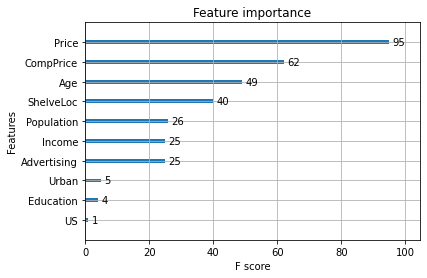

In [67]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)

So the most important Features which causes high sale are **Price and CompPrice.**

# Xgb boosting with feature selection data

In [68]:
### Preparing XGB classifier 
xgb1_fe = xgb.XGBClassifier(n_estimators=30,learning_rate=0.3)
xgb1.fit(x2_train,y1_train)
fe_train_pred = xgb1.predict(x2_train)

In [69]:
import numpy as np
train_acc = np.mean(fe_train_pred==y1_train) 
print(train_acc)

0.9625


In [70]:
test_pred = xgb1.predict(x2_test)

In [71]:
test_acc = np.mean(test_pred==y1_test)
print(test_acc) #73.75

0.7375


In [72]:
features_importance = xgb1.feature_importances_

print("Feature ranking:")
for i, data_class in enumerate(names):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))

Feature ranking:


NameError: name 'names' is not defined

# Insights

+ Even after feature selection we can see that **CompPrice and Income** influence the company more. 
+ These two features can be used to futher increase the sales of the clothing company.
+ Probably by making the sale prices as reasonable as the Competitiors.
+ Or by Giving Discounts to customers according to their income level.